# Skillfactory. Project 2. Разведывательный анализ данных

![Image_header](./chocolate-case.jpg)

## Цели и задачи проекта

В этом проекте я сделал попытку анализа и описания набора данных об учениках, которые сдают государственный экзамен по математике. В наборе данных содержится подробная анонимная информация об учениках, и результат на экзамене, которые ученик получил.

В проекте я:
* проанализировал набор данных на наличие не заполненых значений, и дал свои рекомендации по исправлению
* проанализировал каждый столбец на наличие выбросов, и устранил их
* нашел и устранил два скоррелированных столбца
* сделал вывод о влиянии столцбов на итоговую оценку

### TODO написать еще что-нибудь в список работ по проекту

# Технические детали

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()


In [2]:
DATA_FILE = 'stud_math.xls'
df = pd.read_csv(DATA_FILE)

## Функции используемые для анализа

In [23]:
def column_summary(column_name):
    print(f'Статистика по полонке {column_name}')
    display(df[column_name].value_counts())
    num_na = sum(df[column_name].isna())
    print(f'Пустых значений {num_na}')
    
    median = df[column_name].median()
    perc25 = df[column_name].quantile(0.25)
    perc75 = df[column_name].quantile(0.75)
    IQR = perc75 - perc25
    print('25-й перцентиль: {},'.format(perc25), 
          '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR),
          "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                 l=perc75 + 1.5*IQR
                                                ),
          sep='\n'
         )
    
def display_boxplots(column_name, order=None):
    fig, ax = plt.subplots(figsize=(6,4))
    sns.boxplot(x=column_name, y='score', 
                data=df,
                order=order,
                ax=ax)
    ax.set_title('Boxplot для ' + column_name)
    plt.show()



# Описание набора данных

## Размерность

In [35]:
print('Набор данных содержит {} строк и {} колонок'.format(*df.shape))

Набор данных содержит 395 строк и 30 колонок


In [51]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## А сколько пропущенных значений?

In [36]:
df.isna().sum(axis=0)

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Все колонки, кроме первых трех (школа, пол и возраст) имеют пустые значения

In [37]:
num_rows_full_fill = df.dropna().shape[0]
print(f'Полностью заполненных строк всего {num_rows_full_fill}, поэтому удалять строки с непустыми значениями никак нельзя')

Полностью заполненных строк всего 97, поэтому удалять строки с непустыми значениями никак нельзя


Мой вариант заполнения пустых значение смотрите в разделе обработка данных

# Анализ колонок

## Целевая колонка score

**score — баллы по госэкзамену по математике**

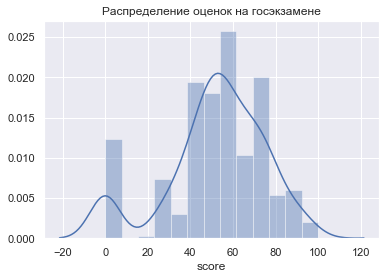

In [38]:
sns.distplot(df.score)
plt.title("Распределение оценок на госэкзамене")
plt.show()

In [39]:
sum(df.score.isna())

6

расределение почти нормальное, 

но есть значения 0, которые скорее всего свидетельствуют что ученик не пришел на тест

тажке есть пустые значения целевой переменной

возможные исправления для этой колонки:
* удалить строки с пустыми значениями (и возможно 0 значения тоже)
* добавить новый признак, сдал ли ученик тест (да/нет)

## Количественные колонки

### Absences
**absences — количество пропущенных занятий**

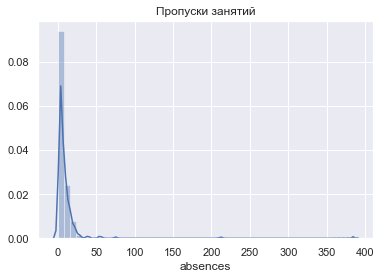

In [27]:
sns.distplot(df.absences)
plt.title("Пропуски занятий")
plt.show()

In [7]:
column_summary('absences')

Статистика по полонке absences


0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Пустых значений 12
25-й перцентиль: 0.0,
75-й перцентиль: 8.0,
IQR: 8.0, 
Границы выбросов: [-12.0, 20.0].


Стандартный способ отсечения выбросов perc75 + 1.5*IQR показывает что все, что больше 20 можно считать выбросом.

Но я считаю, что можно слегка смягчить это условие, и ограничить выбросы 30.

## Категориальные колонки

### Age
**age — возраст ученика (от 15 до 22)**

Колонка, может и похожа на числову, но по сути - это категориальная колонка, с 8 дискретными значениями

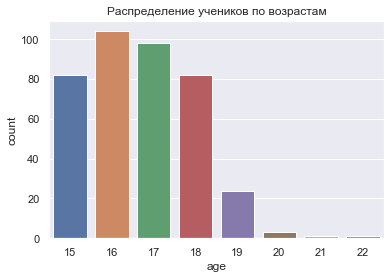

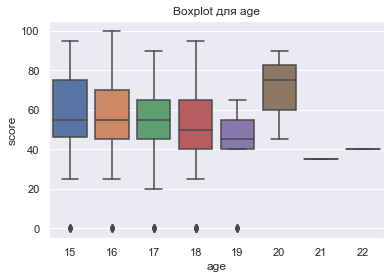

In [154]:
sns.countplot(df.age)
plt.title("Распределение учеников по возрастам")
plt.show()

display_boxplots('age')

У нас нет оснований (исходя из здравого смысла) считать 22-летних учеников - ошибками в данных. Я вполне допускаю такой случай

### school
**school — аббревиатура школы, в которой учится ученик**

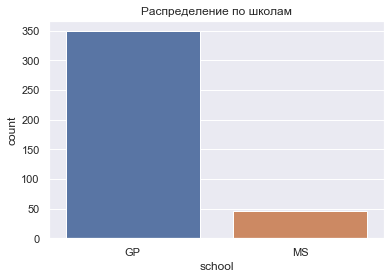

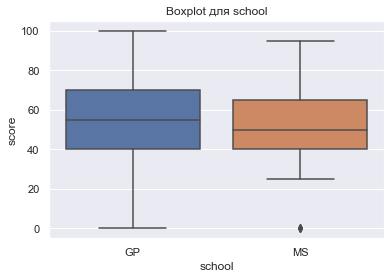

In [156]:
sns.countplot(df.school)
plt.title("Распределение по школам")
plt.show()

display_boxplots('school')

### Sex
**sex — пол ученика ('F' - женский, 'M' - мужской)**

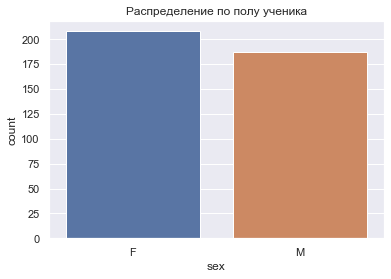

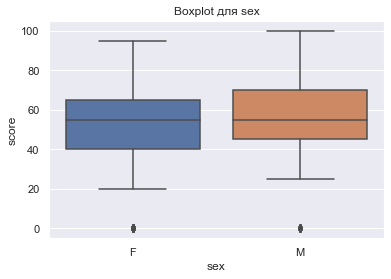

In [157]:
sns.countplot(df.sex)
plt.title("Распределение по полу ученика")
plt.show()

display_boxplots('sex')

### Address
**address — тип адреса ученика ('U' - городской, 'R' - за городом)**

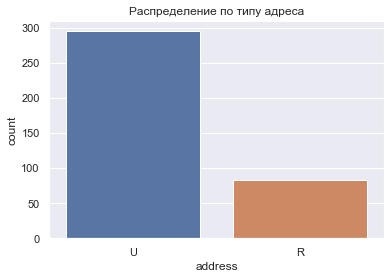

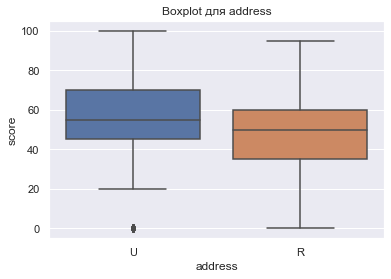

In [158]:
sns.countplot(df.address)
plt.title("Распределение по типу адреса")
plt.show()
display_boxplots('address')

### famsize
**famsize — размер семьи('LE3' <= 3, 'GT3' >3)**

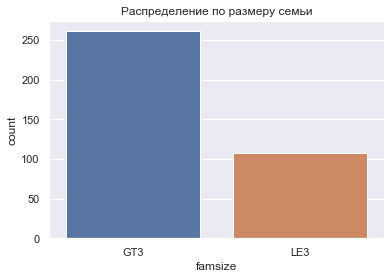

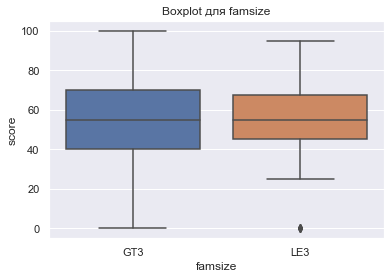

In [159]:
sns.countplot(df.famsize)
plt.title("Распределение по размеру семьи")
plt.show()

display_boxplots('famsize')

### Pstatus
**Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)**

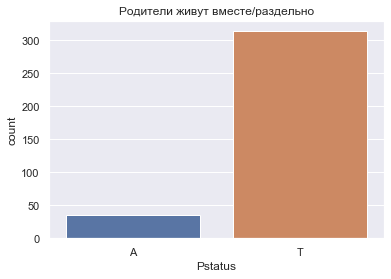

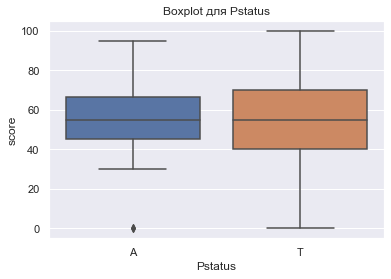

In [160]:
sns.countplot(df.Pstatus)
plt.title("Родители живут вместе/раздельно")
plt.show()
display_boxplots('Pstatus')

### Medu
**Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)**

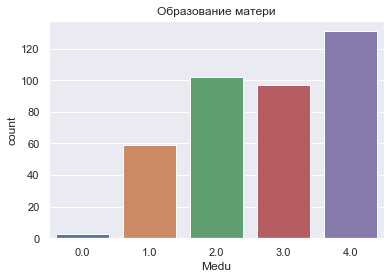

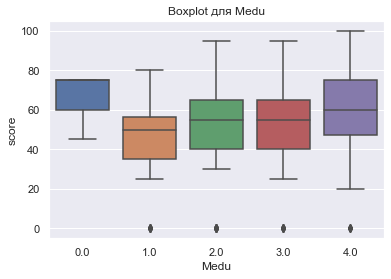

In [161]:
sns.countplot(df.Medu)
plt.title("Образование матери")
plt.show()
display_boxplots('Medu')

### Fedu
**Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)**

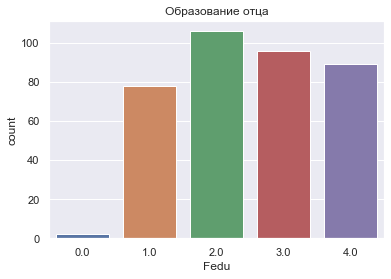

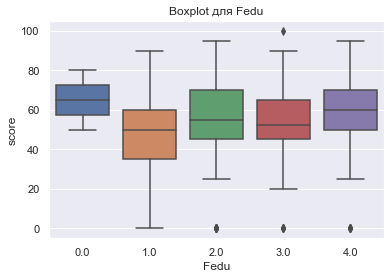

In [18]:
sns.countplot(df.Fedu)
plt.title("Образование отца")
plt.show()
display_boxplots('Fedu')

Видим значение 40 в этой колонке. Этого значения нету в описании.

Мы можем или исключить эту строку из анализа, или попытаться угадать значение в этой строке.

Удалять строки с такого маленького набора данных очень не рекомендуется, поэтому давайте попробуем угадать правильно значение.

Я думаю что 40 - это опечатка, на самом деле должно быть или 4 или 0. Значение 4 встречается чаще, поэтому давайте считать что в этом поле должно быть 4.

Само исправление смотрите в разделе обработка данных

### Mjob
**Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)**

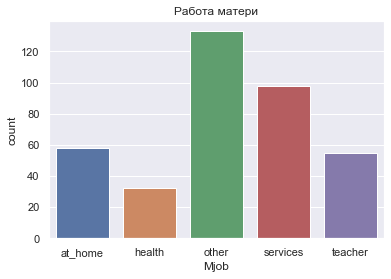

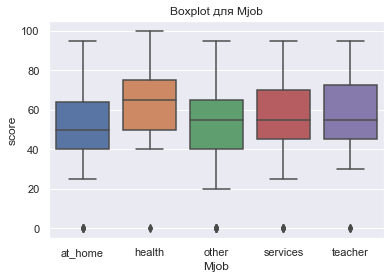

In [163]:
sns.countplot(df.Mjob.sort_values())
plt.title("Работа матери")
plt.show()
display_boxplots('Mjob')

### Fjob
**Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)**

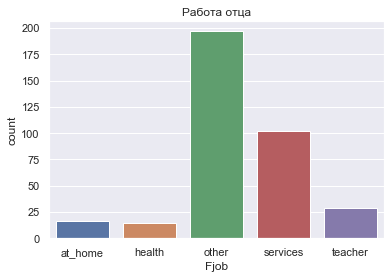

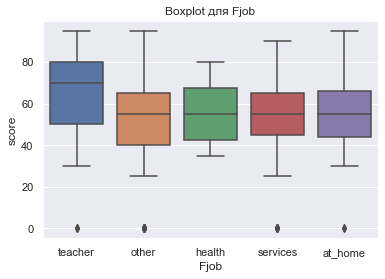

In [164]:
sns.countplot(df.Fjob.sort_values())
plt.title("Работа отца")
plt.show()
display_boxplots('Fjob')

### reason
**reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)**

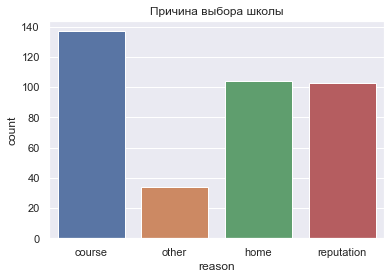

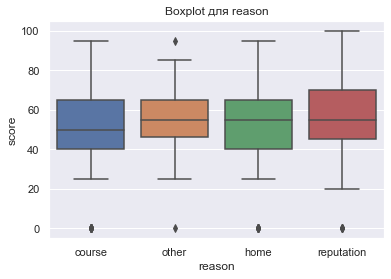

In [165]:
sns.countplot(df.reason)
plt.title("Причина выбора школы")
plt.show()
display_boxplots('reason')

### guardian
**guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)**

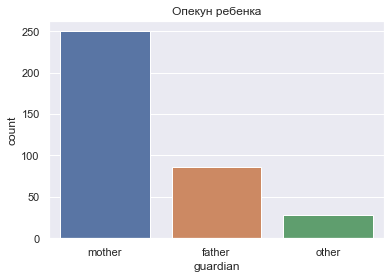

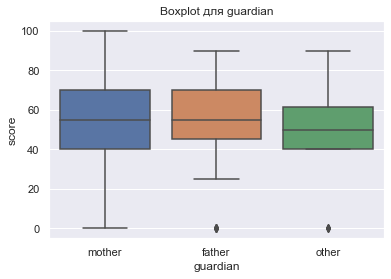

In [166]:
sns.countplot(df.guardian)
plt.title("Опекун ребенка")
plt.show()
display_boxplots('guardian')

### traveltime
**traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)**

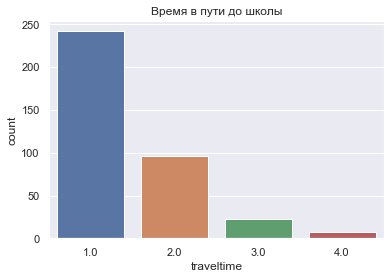

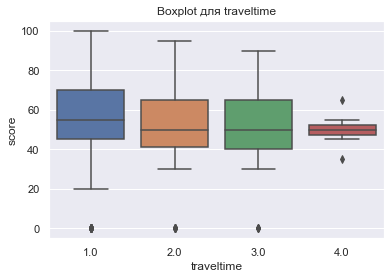

In [167]:
sns.countplot(df.traveltime)
plt.title("Время в пути до школы")
plt.show()
display_boxplots('traveltime')

### studytime
**studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)**

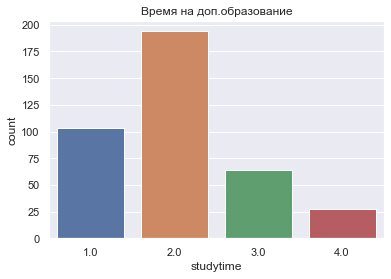

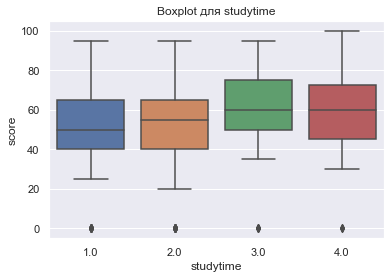

In [168]:
sns.countplot(df.studytime)
plt.title("Время на доп.образование")
plt.show()
display_boxplots('studytime')

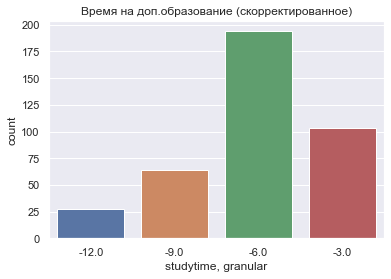

In [91]:
sns.countplot(df['studytime, granular'])
plt.title("Время на доп.образование (скорректированное)")
plt.show()

#### Корреляционный анализ, и исправление скоррелированной колонке

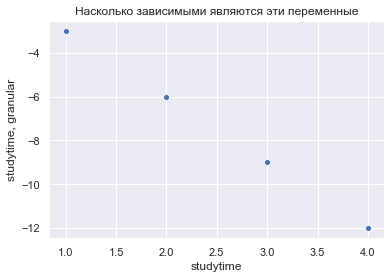

In [92]:
sns.scatterplot(data=df, x='studytime', y='studytime, granular')
plt.title('Насколько зависимыми являются эти переменные')
plt.show()

In [93]:
df[['studytime','studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


Ну и так было видно, что эти 2 колонки абсолютно скоррелированы, но мы выяснили это достоверно

Можно удалять вторую колонку, она абсолютно не нужна, и будет только мешать

### failures
**failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)**

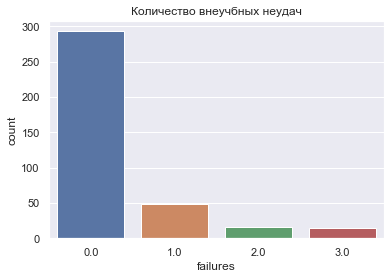

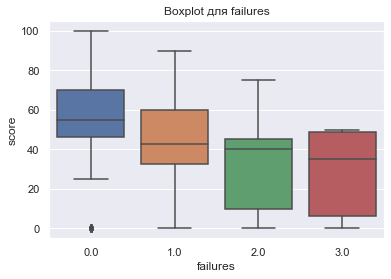

In [169]:
sns.countplot(df.failures)
plt.title("Количество внеучбных неудач")
plt.show()
display_boxplots('failures')

### schoolsup
**schoolsup — дополнительная образовательная поддержка (yes или no)**

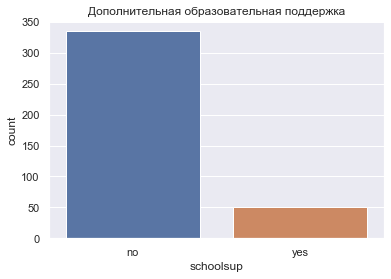

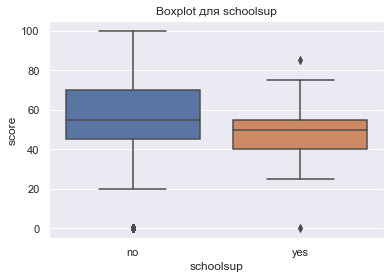

In [172]:
sns.countplot(df.schoolsup, order=['no','yes'])
plt.title("Дополнительная образовательная поддержка")
plt.show()
display_boxplots('schoolsup', order=['no','yes'])

### famsup
**famsup — семейная образовательная поддержка (yes или no)**

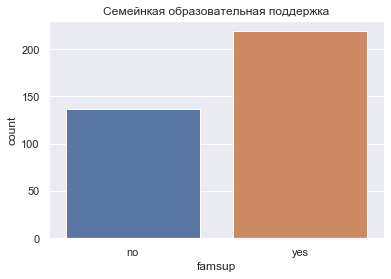

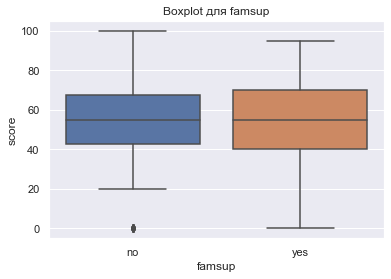

In [173]:
sns.countplot(df.famsup, order=['no','yes'])
plt.title("Семейнкая образовательная поддержка")
plt.show()
display_boxplots('famsup', order=['no','yes'])

### paid
**paid — дополнительные платные занятия по математике (yes или no)**

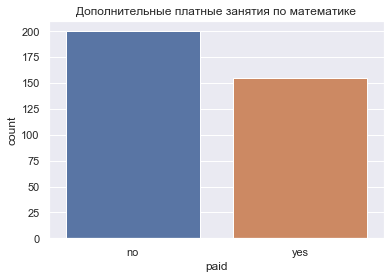

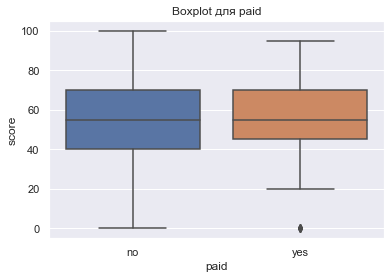

In [174]:
sns.countplot(df.paid, order=['no','yes'])
plt.title("Дополнительные платные занятия по математике")
plt.show()
display_boxplots('paid', order=['no','yes'])

### activites
**activities — дополнительные внеучебные занятия (yes или no)**

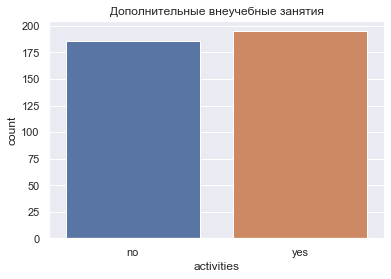

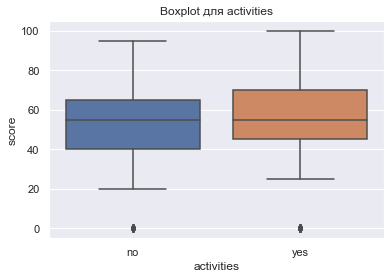

In [175]:
sns.countplot(df.activities, order=['no','yes'])
plt.title("Дополнительные внеучебные занятия")
plt.show()
display_boxplots('activities', order=['no','yes'])

### nursery
**nursery — посещал детский сад (yes или no)**

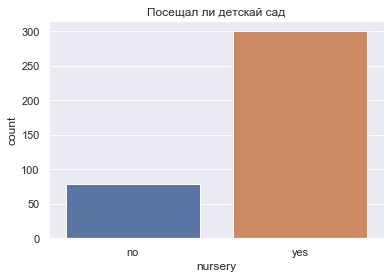

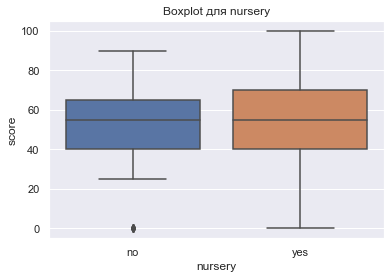

In [176]:
sns.countplot(df.nursery, order=['no','yes'])
plt.title("Посещал ли детскай сад")
plt.show()
display_boxplots('nursery', order=['no','yes'])

### higher
**higher — хочет получить высшее образование (yes или no)**

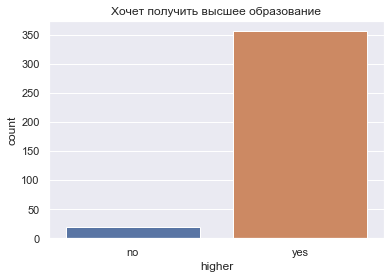

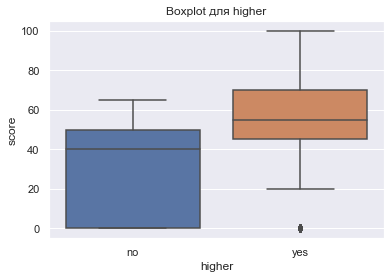

In [177]:
sns.countplot(df.higher, order=['no','yes'])
plt.title("Хочет получить высшее образование")
plt.show()
display_boxplots('higher', order=['no','yes'])

### internet
**internet — наличие интернета дома (yes или no)**

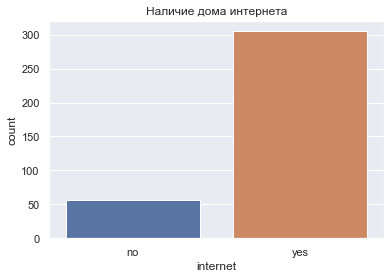

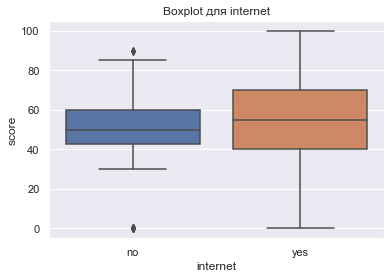

In [178]:
sns.countplot(df.internet, order=['no','yes'])
plt.title("Наличие дома интернета")
plt.show()
display_boxplots('internet', order=['no','yes'])

### romantic
**romantic — в романтических отношениях (yes или no)**

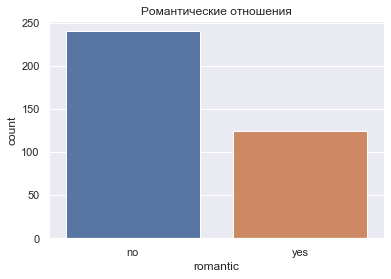

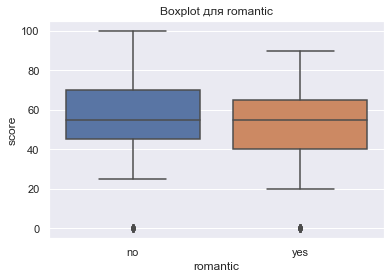

In [179]:
sns.countplot(df.romantic, order=['no','yes'])
plt.title("Романтические отношения")
plt.show()
display_boxplots('romantic', order=['no','yes'])

### famrel
**famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)**

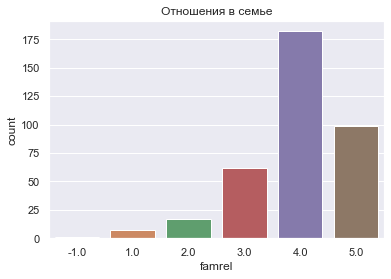

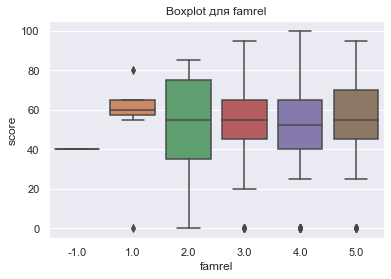

In [181]:
sns.countplot(df.famrel)
plt.title("Отношения в семье")
plt.show()
display_boxplots('famrel')

В этой колонке есть недопустимое значение -1. Как и раньше мы можем его либо исправить, либо удалить всю строку с этим значением.

Я выбираю вариант исправить значение, и считаю что вместо -1 должно стоять значение 1 (очень плохо)

Исправление смотрите в разделе Обработка данных

### freetime
**freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)**

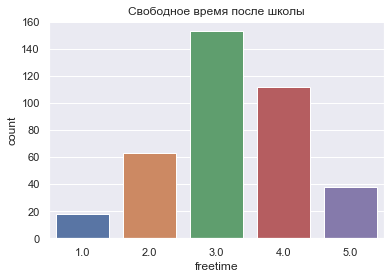

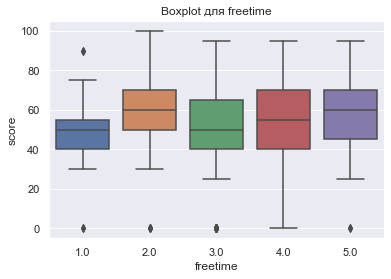

In [182]:
sns.countplot(df.freetime)
plt.title("Свободное время после школы")
plt.show()
display_boxplots('freetime')

### goout
**goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)**

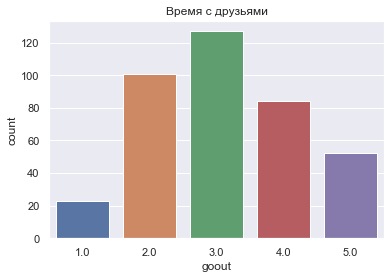

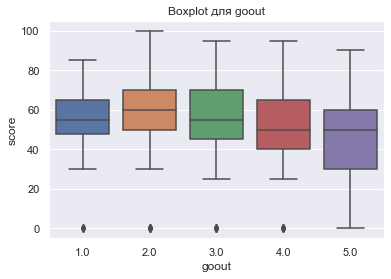

In [183]:
sns.countplot(df.goout)
plt.title("Время с друзьями")
plt.show()
display_boxplots('goout')

### health
**health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)**

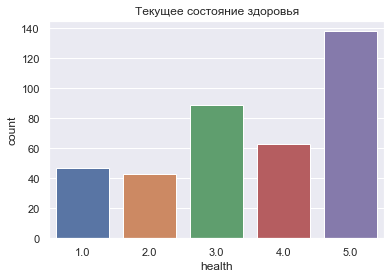

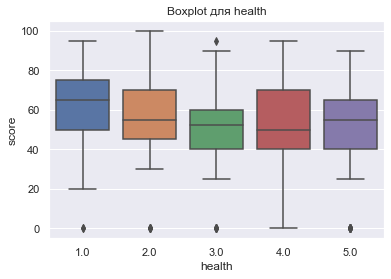

In [184]:
sns.countplot(df.health)
plt.title("Текущее состояние здоровья")
plt.show()
display_boxplots('health')

# Обработка данных

In [22]:
# Очистка строк где пустая целевая переменная

In [15]:
df.loc[df.Fedu == 40, 'Fedu'] = 4

In [19]:
#Обрезка выбросов в adsences


In [95]:
df.drop('studytime, granular', axis=1, inplace=True)

In [20]:
# Исправление значение в колонке famrel


## Заполним пустые значения

# Неменого статистического анализа

гипотезы и статистические формулы

In [25]:
# найти колонки, которые не влияют никак на итоговый результат
# написать формулу в описание графика, или column_summary

# Выводы


# Итоги работы